## OCEAN  model

Understanding the model and personlaty traits
- **Openness** describes a person's tendency to think abstractly. 
    * Those who are high in Openness tend to be creative, adventurous, and intellectual. They enjoy playing with ideas and discovering novel experiences. 
    * Those who are low in Openness tend to be practical, traditional, and focused on the concrete. They tend to avoid the unknown and follow traditional ways.

- **Conscientiousness** describes a person's level of goal orientation and persistence. 
    * Those who are high in Conscientiousness are organized and determined, and are able to forego immediate gratification for the sake of long-term achievement. 
    * Those who are low in this trait are impulsive and easily sidetracked.

- **Extraversion** describes a person’s inclination to seek stimulation from the outside world, especially in the form of attention from other people. 
    * Extraverts engage actively with others to earn friendship, admiration, power, status, excitement, and romance. 
    * Introverts, on the other hand, conserve their energy, and do not work as hard to earn these social rewards.

- **Agreeableness** describes the extent to which a person prioritizes the needs of others over their own needs. 
    * People who are high in Agreeableness experience a great deal of empathy and tend to get pleasure out of serving and taking care of others. 
    * People who are low in Agreeableness tend to experience less empathy and put their own concerns ahead of others

- **Neuroticism** describes a person's tendency to respond to stressors with negative emotions, including fear, sadness, anxiety, guilt, and shame. 
    * High Neuroticism scorers are more likely to react to a situation with strong negative emotions. 
    * Low Neuroticism scorers are more likely to brush off their misfortune and move on.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ocean-modelB/Data/data.csv', delimiter='\t')

## Understanding Dataset

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [ ]:
df.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [ ]:
labels = ['dateload','screenw','screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country','lat_appx_lots_of_err', 'long_appx_lots_of_err']
df.drop(labels = labels, axis = 1, inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop(df.columns[50::], axis = 1, inplace = True)

In [ ]:
df = df.astype('int')

## Removing results with no answers

In [ ]:
df.apply(pd.Series.value_counts)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3720,6099,6075,6893,9781,6183,8179,6372,6845,6261,7799,9579,5508,10656,6101,10847,6300,7388,6370,7155,4957,9281,5016,7636,6523,10359,6299,8526,6058,8403,12197,6436,6059,6823,7834,6652,7294,8141,7503,8697,9201,5942,7588,6661,7682,8128,8468,8026,7692,6177
1,249711,210104,76730,102032,98458,266568,236795,78165,173361,76504,117784,87770,43905,191518,166897,178925,128058,234116,130076,202847,396596,35078,383258,35923,292382,54051,307956,32969,49009,33452,66999,203319,20003,214472,221768,223299,43148,235147,111469,26983,43885,380019,23623,413679,16295,467713,15443,104034,19947,16599
2,199165,235528,191723,208184,178508,338198,227788,175759,221323,158282,183176,218673,102929,289708,265718,254775,240366,260562,226979,254423,259618,89452,239459,82151,362339,103175,369243,105263,101680,97947,171808,208729,74174,292320,276559,243399,94827,274174,193348,96093,102456,317600,72640,301853,59380,308248,56429,198347,56683,63589
3,288622,244683,269135,280161,234463,191408,194827,229962,214960,191349,203603,262525,148320,252912,227452,213321,233053,199382,210561,219242,128696,187704,174968,145516,180153,183534,181563,215677,159607,304193,267921,190768,162834,230654,238053,163467,227699,316261,230381,317391,251362,186185,174477,189074,273047,118871,181066,252198,128099,212145
4,191638,190216,284124,257148,299214,139539,197374,274953,242310,268237,270405,279762,360587,173619,236006,227214,245103,194068,283192,207767,134481,354264,150767,367687,116679,329374,108039,406731,376721,348684,344830,244587,380116,184160,174332,213988,370522,132722,299503,354035,331967,88755,314183,69056,395637,73520,401972,286486,344402,343342
5,80702,126928,185771,159140,193134,71662,148595,248347,154759,312925,230791,155249,352309,95145,111384,128476,160678,118042,156380,122124,89210,337779,60090,374645,55482,333065,40458,244392,320483,220879,149803,159719,370372,85129,95012,162753,270068,47113,171354,210359,274687,35057,421047,33235,261517,37078,350180,164467,456735,371706


In [ ]:
labels = df.columns
df = df[(df[labels] != 0).all(axis = 1)]

In [ ]:
df.apply(pd.Series.value_counts)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
1,216949,179468,66519,86970,85967,229996,207648,66244,150045,64801,102045,75163,37837,166644,144833,155797,110599,203871,112380,174910,345553,29690,330671,30881,251338,46716,264735,28083,42374,28697,57390,175321,16660,185349,194210,194450,35949,204034,96392,22509,36361,333641,19822,363445,13470,406742,12548,87439,16458,13820
2,176207,205925,168457,181098,158114,297333,200884,152483,194494,136922,160328,191648,89699,254956,233202,224365,211311,229543,199050,222548,229268,78231,210046,71587,318520,90602,324596,91935,89077,86077,150517,183022,63831,256914,243258,214311,81551,241599,169116,83045,87669,278589,63053,264536,51114,271894,47774,172109,48261,55295
3,247835,212344,234223,242115,204662,165199,168070,198204,185618,164581,175718,227439,127003,218478,196518,185200,201659,171484,182001,189066,110337,162662,151411,125674,155746,159728,156600,187114,138191,265521,232354,164129,139617,199571,205566,140296,196629,273127,199321,274874,216336,157970,150065,160637,237110,101925,154569,218249,108445,183559
4,166599,167015,247551,226729,261179,121334,171441,241798,211865,235322,236879,245952,315779,152335,205698,199144,214107,169273,247851,182566,115838,311182,131407,322471,101651,290154,94310,356968,329226,304877,304453,214209,333185,160362,151050,186370,326125,115621,262436,311302,292995,75357,275245,58583,346624,63194,352316,252740,301127,300195
5,66844,109682,157684,137522,164512,60572,126391,215705,132412,272808,199464,134232,304116,82021,94183,109928,136758,100263,133152,105344,73438,292669,50899,323821,47179,287234,34193,210334,275566,189262,129720,137753,321141,72238,80350,139007,234180,40053,147169,182704,241073,28877,366249,27233,226116,30679,307227,143897,400143,321565


### Columns for all personality traits

In [ ]:
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [ ]:
traits = [ EXT, EST, AGR, CSN, OPN]
titles = ['Extraversion',  'Neuroticism', 'Agreeableness', 'Conscientiousness','Openess']

### Box Plots

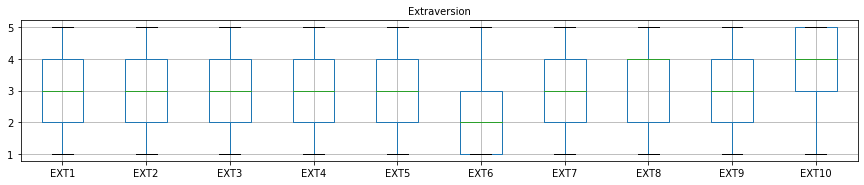

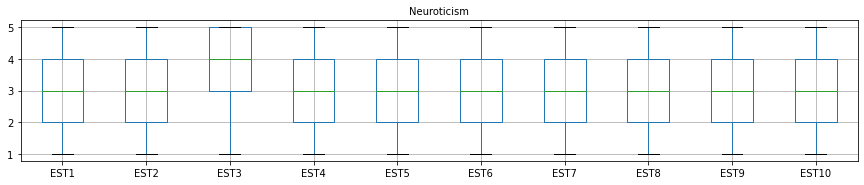

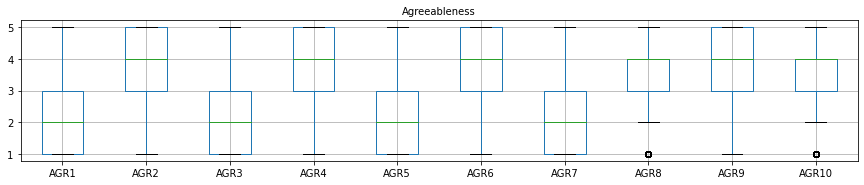

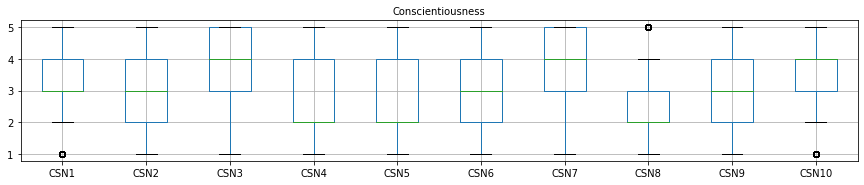

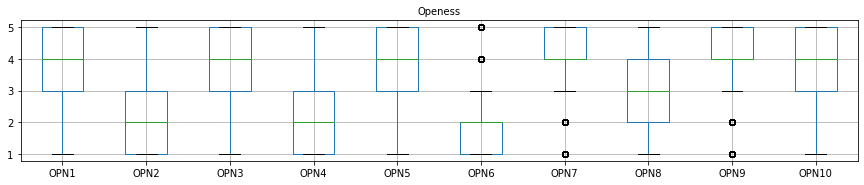

In [ ]:
for i in range(1, 6):
    plt.figure(figsize = (15,15))
    plt.subplot(5,1,i)
    boxplot = df.boxplot(column = traits[i-1], fontsize = 10, figsize=(5,5))
    plt.title(titles[i - 1], fontsize = 10)

### Questions

In [ ]:
EXT_Q = {
    'EXT1' : "I am the life of the party.",
    'EXT2' : "I don't talk a lot.",
    'EXT3' : "I feel comfortable around people.",
    'EXT4' : "I keep in the background.",
    'EXT5' : "I start conversations.",
    'EXT6' : "I have little to say.",
    'EXT7' : "I talk to a lot of different people at parties.",
    'EXT8' : "I don't like to draw attention to myself.",
    'EXT9' : "I don't mind being the center of attention.",
    'EXT10' : "I am quiet around strangers.",
}

In [ ]:
EST_Q= {
    'EST1' : "I get stressed out easily.",
    'EST2' : "I am relaxed most of the time.",
    'EST3' : "I worry about things.",
    'EST4' : "I seldom feel blue.",
    'EST5' : "I am easily disturbed.",
    'EST6' : "I get upset easily.",
    'EST7' : "I change my mood a lot.",
    'EST8' : "I have frequent mood swings.",
    'EST9' : "I get irritated easily.",
    'EST10' : "I often feel blue.",
}

In [ ]:
AGR_Q = {
    'AGR1' : "I feel little concern for others.",
    'AGR2' : "I am interested in people.",
    'AGR3' : "I insult people.",
    'AGR4' : "I sympathize with others' feelings.",
    'AGR5' : "I am not interested in other people's problems.",
    'AGR6' : "I have a soft heart.",
    'AGR7' : "I am not really interested in others.",
    'AGR8' : "I take time out for others.",
    'AGR9' : "I feel others' emotions.",
    'AGR10' : "I make people feel at ease.",
}

In [ ]:
CSN_Q = {	
    'CSN1' : "I am always prepared.",
    'CSN2' : "I leave my belongings around.",
    'CSN3' : "I pay attention to details.",
    'CSN4' : "I make a mess of things.",
    'CSN5' : "I get chores done right away.",
    'CSN6' : "I often forget to put things back in their proper place.",
    'CSN7' : "I like order.",
    'CSN8' : "I shirk my duties.",
    'CSN9' : "I follow a schedule.",
    'CSN10' : "I am exacting in my work.",
}

In [ ]:
OPN_Q = {
    'OPN1' : "I have a rich vocabulary.",
    'OPN2' : "I have difficulty understanding abstract ideas.",
    'OPN3' : "I have a vivid imagination.",
    'OPN4' : "I am not interested in abstract ideas.",
    'OPN5' : "I have excellent ideas.",
    'OPN6' : "I do not have a good imagination.",
    'OPN7' : "I am quick to understand things.",
    'OPN8' : "I use difficult words.",
    'OPN9' : "I spend time reflecting on things.",
    'OPN10' : "I am full of ideas.",
}

In [ ]:
def questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins = 14, color = color, alpha = .5)
        plt.title(questions[groupname[i-1]], fontsize=18)

### Distribution of results for all the questions

*Extraversion*

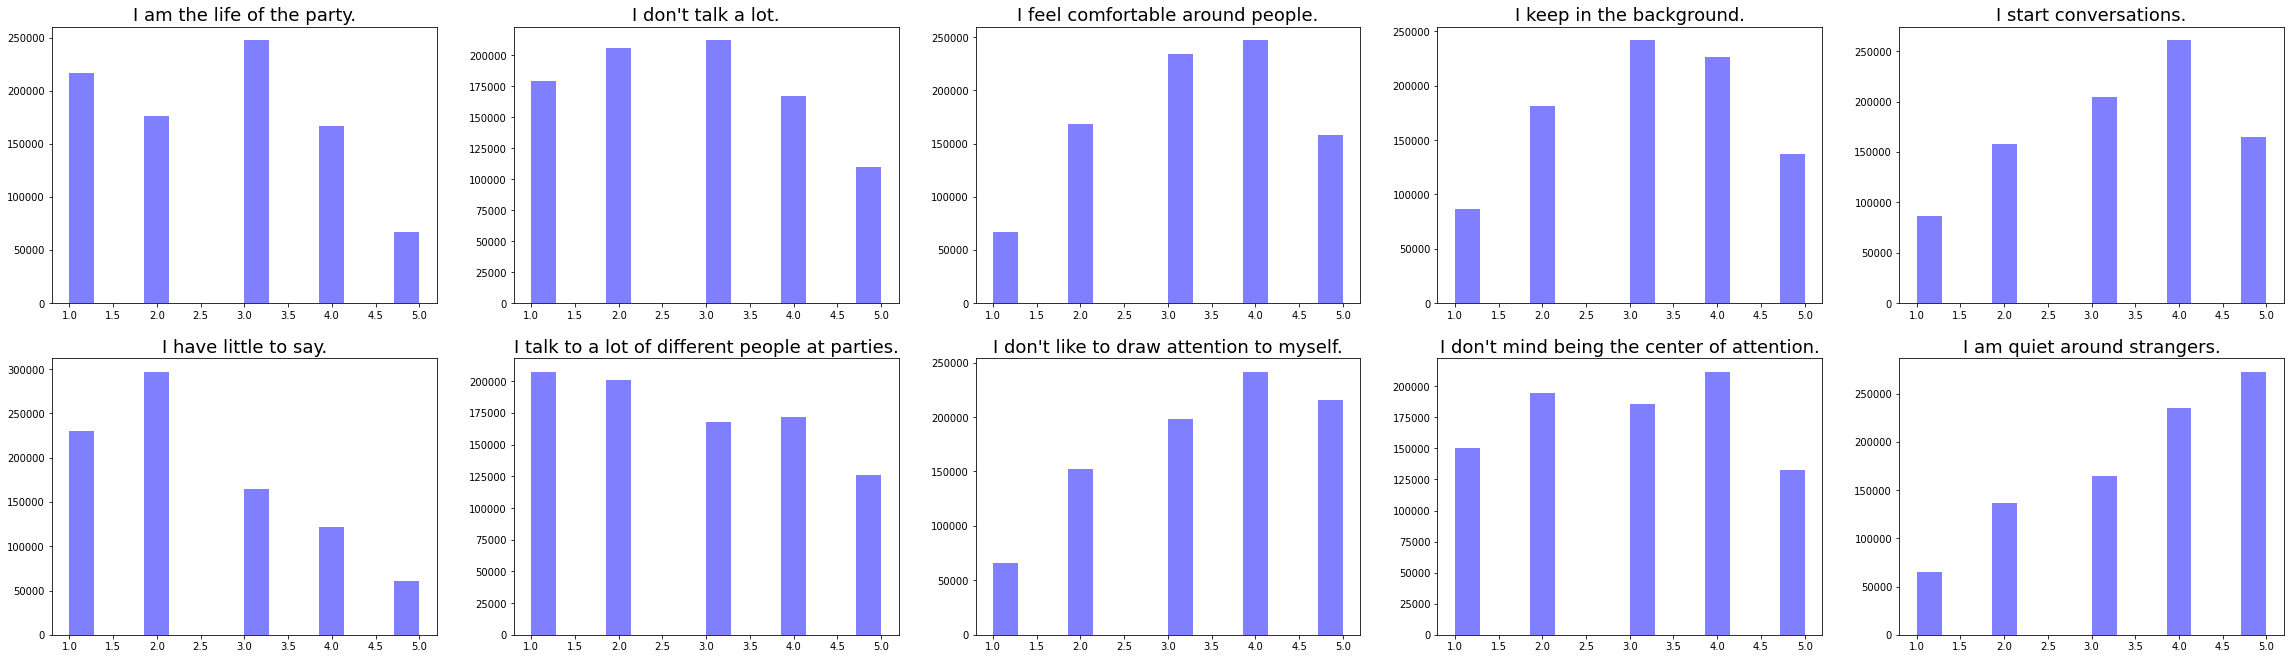

In [ ]:
questions(EXT, EXT_Q, 'blue')

*Neuroticism*

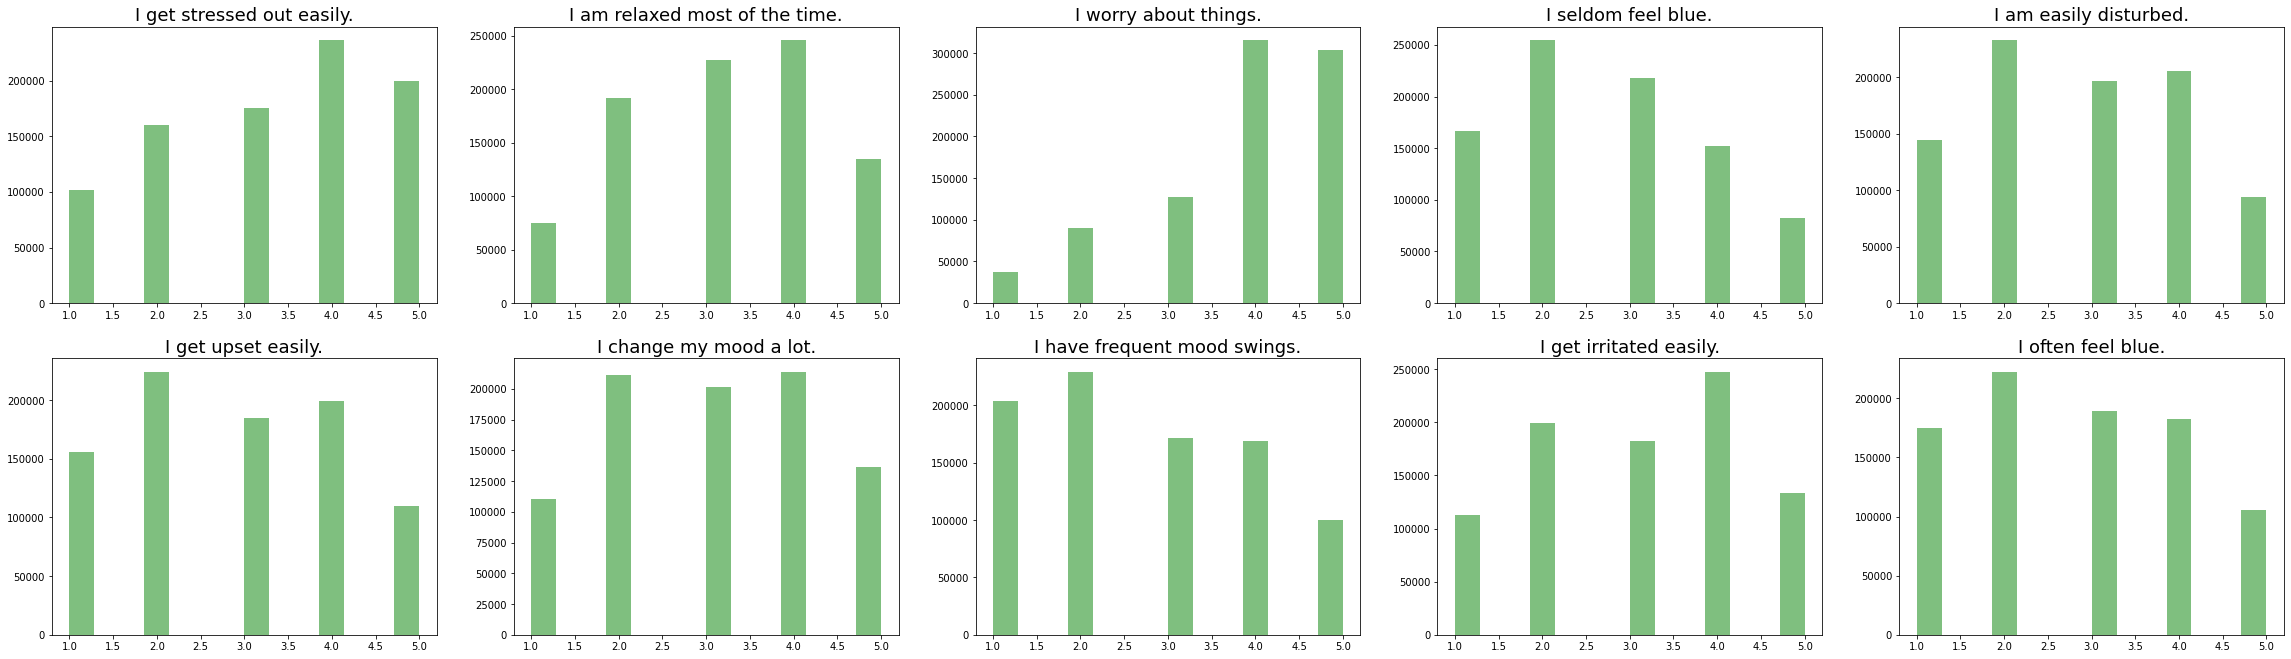

In [ ]:
questions(EST, EST_Q, 'green')

*Agreableness*

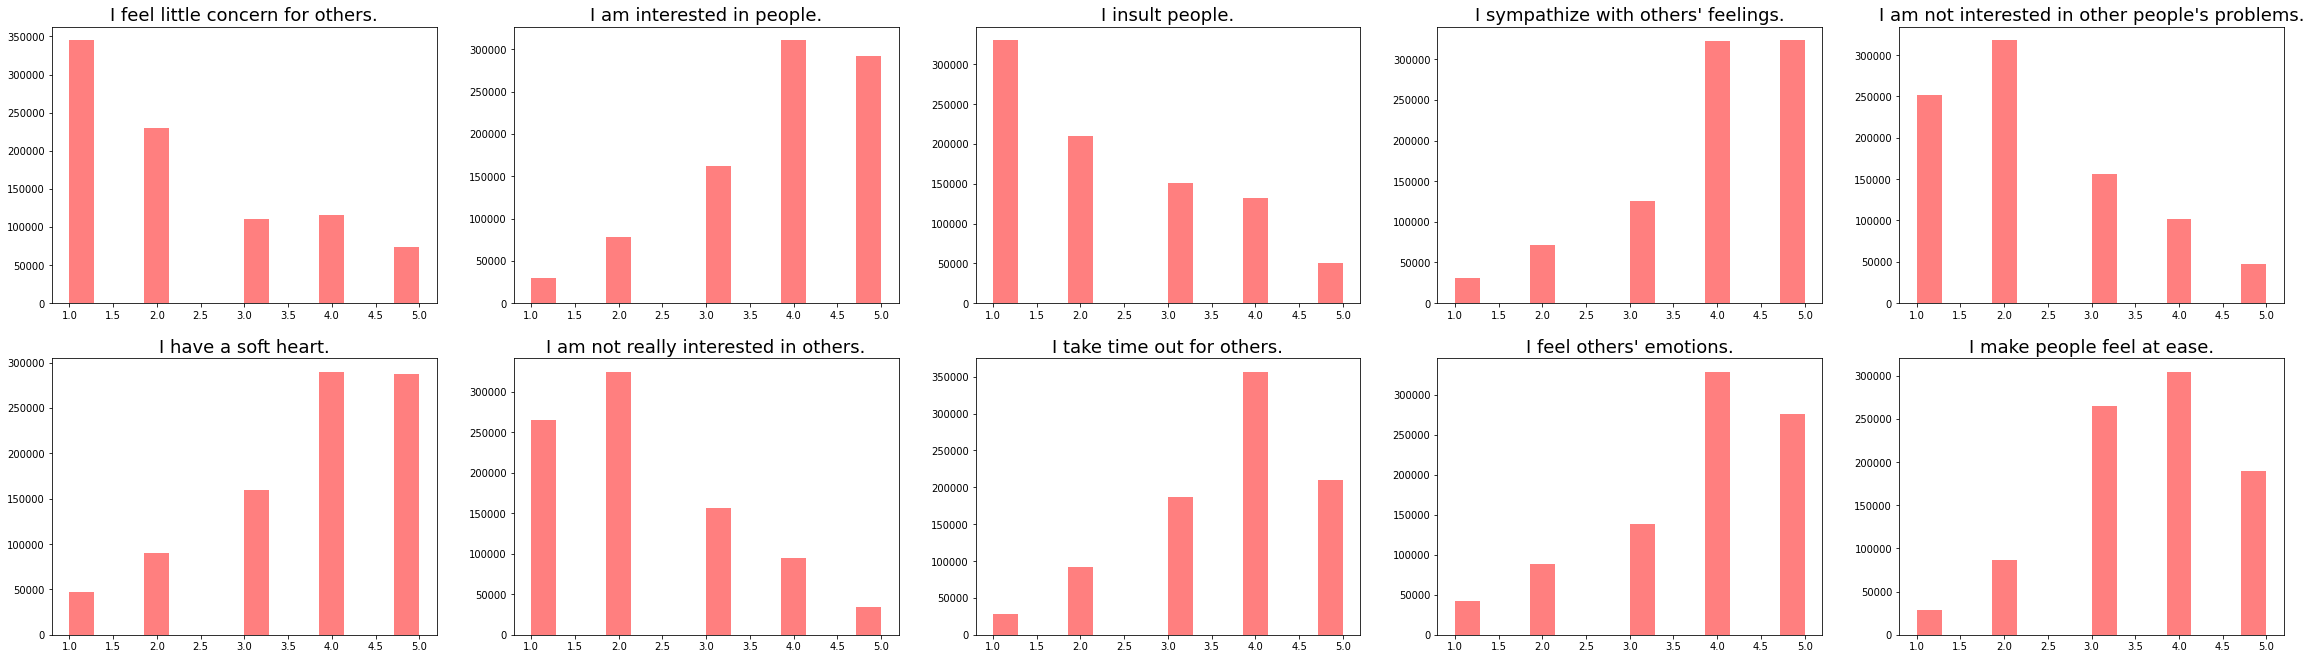

In [ ]:
questions(AGR, AGR_Q, 'red')

*Conscientiousness*

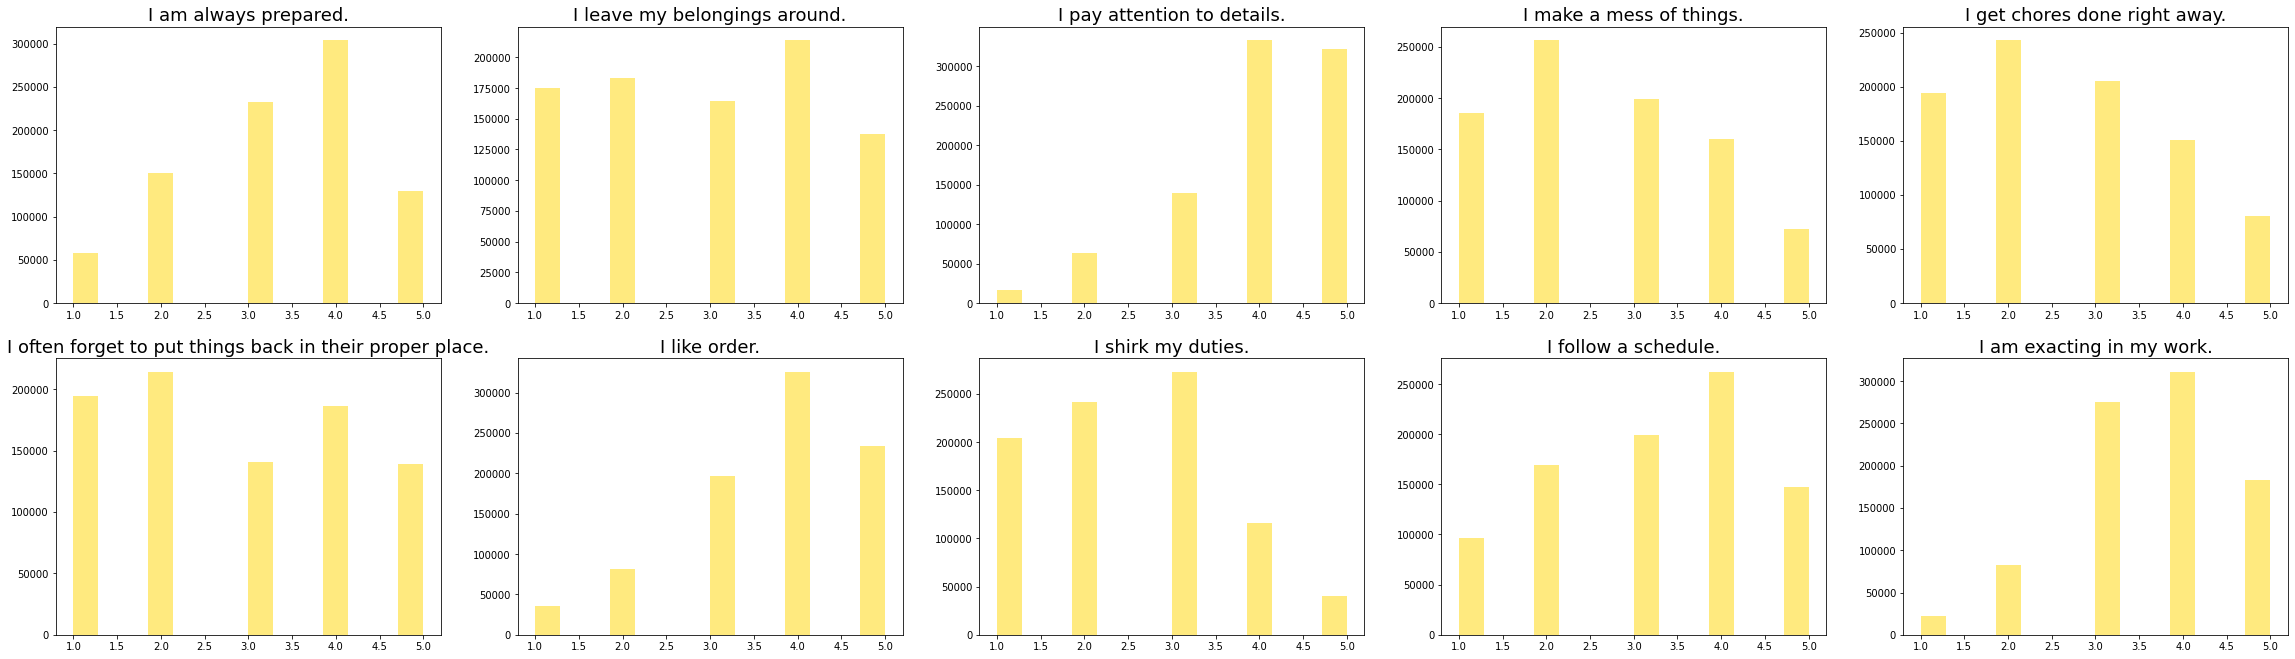

In [ ]:
questions(CSN, CSN_Q, 'gold')

*Opneness*

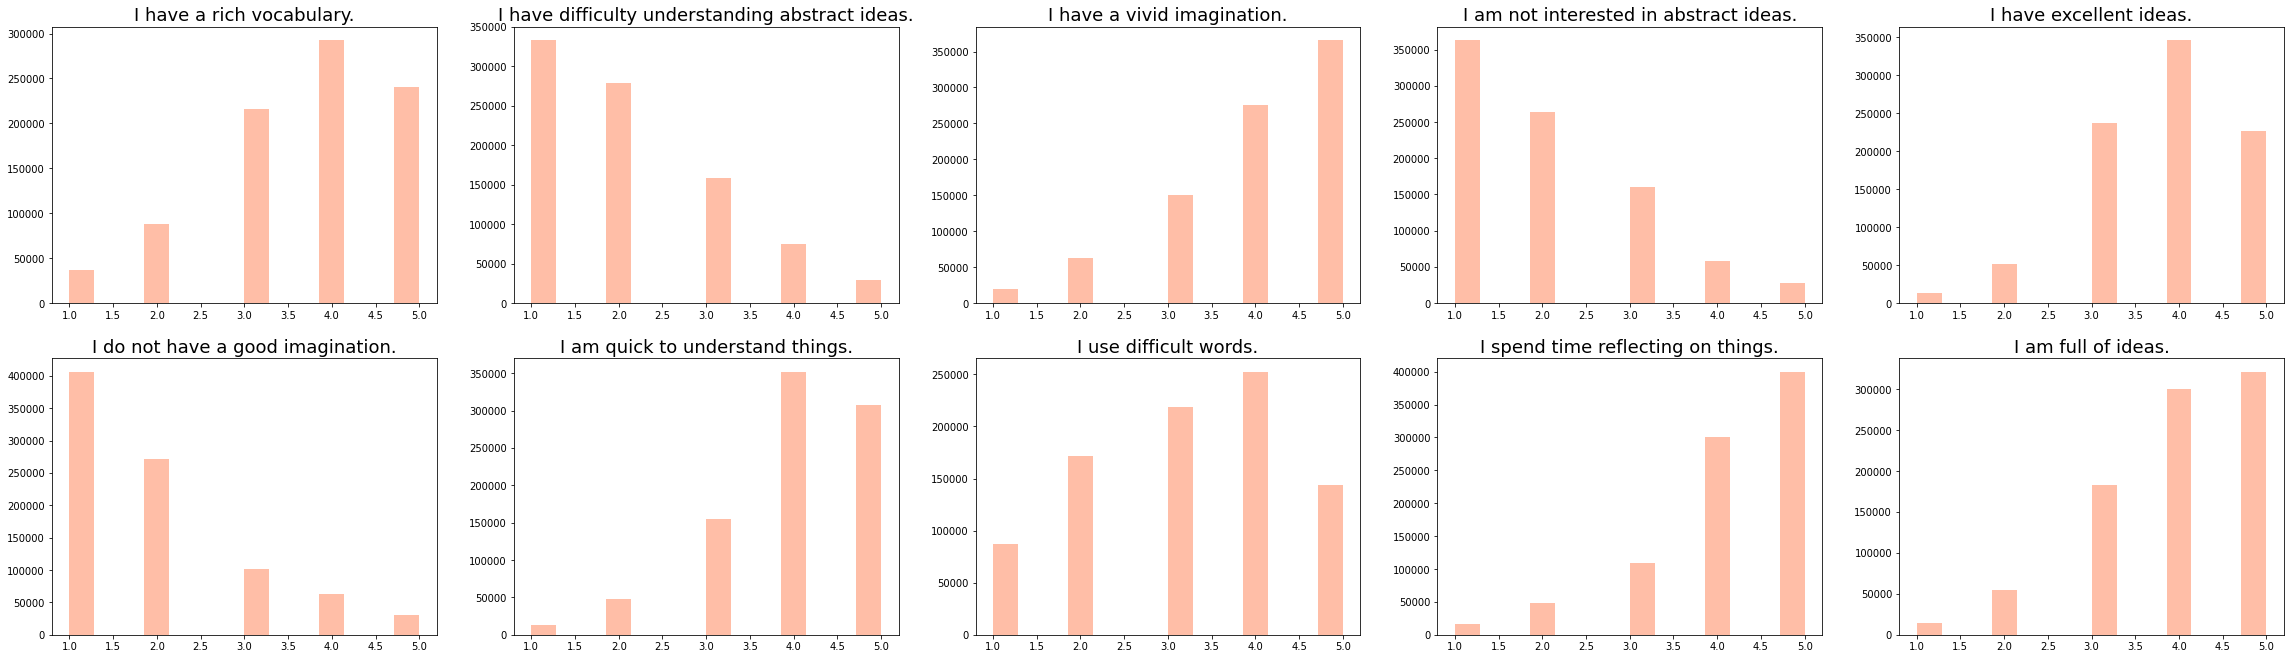

In [ ]:
questions(OPN, OPN_Q, 'coral')

In [ ]:
df.to_csv('/content/drive/MyDrive/ocean-modelB/Data/final_big_five.csv')